In [9]:
import numpy as np
weights = np.zeros((11591, 11))
wt_file = open('features.category')

In [10]:
i = 0
for line in wt_file.readlines():
    line = line.strip().split(' ')
    j = 0
    for word in line:
        weights[i][j] = word
        j += 1
    i += 1
weights.shape

(11591, 11)

In [12]:
# sanity check
print(weights[0])
print(weights[900])
print(type(weights[0][1]))

[-1.20250046e-39  3.02578174e-40 -1.01787097e-39 -1.30734841e-39
 -1.16337760e-39  4.04173713e-40 -9.14478970e-40 -7.49338749e-40
 -6.85113036e-40 -5.16936201e-40 -9.63489384e-40]
[-1.20250046e-39  3.02578174e-40 -1.01787097e-39 -1.30734841e-39
 -1.16337760e-39  4.04173713e-40 -9.14478970e-40  3.71700023e-40
  4.35925735e-40 -5.16936201e-40 -9.63489384e-40]
<class 'numpy.float64'>


In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0, init = 'k-means++', max_iter = 500, n_init = 1).fit(weights)
labels = kmeans.labels_
print(len(labels))

11591


In [27]:
import pandas as pd
data = pd.read_csv('category.csv')
text, label = [], []
for i in data.index:
    text.append(data['DESCRIPTION'][i])
    label.append(data['CATEGORY'][i])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
label_ids = [0, 1, 2, 3, 4] #, 5, 6, 7, 8, 9, 10]
text_j = [] # text_j[0] -- all texts for cluster 0 -- get tfidf to get top 10 features
labels_dict = [] # labels_dict[0] -- dictionary of counts for categories in cluster 0
for i in range(11):
    dict_ = defaultdict(int)
    text_ = []
    labels_dict.append(dict_)
    text_j.append(text_)
    
for i in range(len(labels)):
    for j in label_ids:
        if labels[i] == j:
            text_j[j].append(text[i])
            labels_dict[j][label[i]] += 1

print(text_j)    

[['everyday when a girl has been sent to the shop she is being disturbs y a man', 'there is a girl whom boys have been writing a letter to her and putting in her bag', 'there is a man who like following following a girl and she is afraid of telling her parents', 'I have a friend who was raped and she now has a child ,she needs advice', "If a boy comes and asks you if you can be his girlfriend why do you always keep him in your mind and even if you don't see him after a long time i still think of him ,what should i do?", "My cousin was raped 1 year ago and there is a boy who disturbs me and i don't know what to do and i even fear walking in front of boys", 'If your periods take long time to appear what might be wrong, If a boy is disturbing you and you have refused and he still follows you what do you do and if a boy tells you to have sex with him and he pays you what should you do ?', 'a girl is complaining that she is being disturbed by a boy', 'If you have sex will you get HIV and AI

In [34]:
for i in range(5):
    print("Cluster Label: ", i)
    if i == 3: print("COMMENTING CLUSTER .. 612")
    if i == 2: print("CATCALLS .. 559")
    if i == 0: print("TOUCHING GROPING ..  485")
    if i == 4: print("OGLING")
    for key, value in labels_dict[i].items():
        print(key, " --- ", value)
    print("\n")

Cluster Label:  0
TOUCHING GROPING ..  485
Sexual Invites  ---  134
Rape / Sexual Assault  ---  91
Others  ---  193
Commenting  ---  579
Chain Snatching  ---  74
Touching /Groping  ---  485
Stalking  ---  82
Ogling/Facial Expressions/Staring  ---  264
Catcalls/Whistles  ---  531
Indecent exposure  ---  75
Taking pictures  ---  67


Cluster Label:  1
Others  ---  148
Touching /Groping  ---  339
Sexual Invites  ---  99
Commenting  ---  404
Indecent exposure  ---  59
Catcalls/Whistles  ---  432
Rape / Sexual Assault  ---  76
Taking pictures  ---  57
Ogling/Facial Expressions/Staring  ---  191
Stalking  ---  78
Chain Snatching  ---  49


Cluster Label:  2
CATCALLS .. 559
Stalking  ---  103
Catcalls/Whistles  ---  559
Sexual Invites  ---  134
Commenting  ---  547
Touching /Groping  ---  465
Chain Snatching  ---  73
Rape / Sexual Assault  ---  93
Ogling/Facial Expressions/Staring  ---  255
Others  ---  199
Indecent exposure  ---  69
Taking pictures  ---  79


Cluster Label:  3
COMMENTING CLU

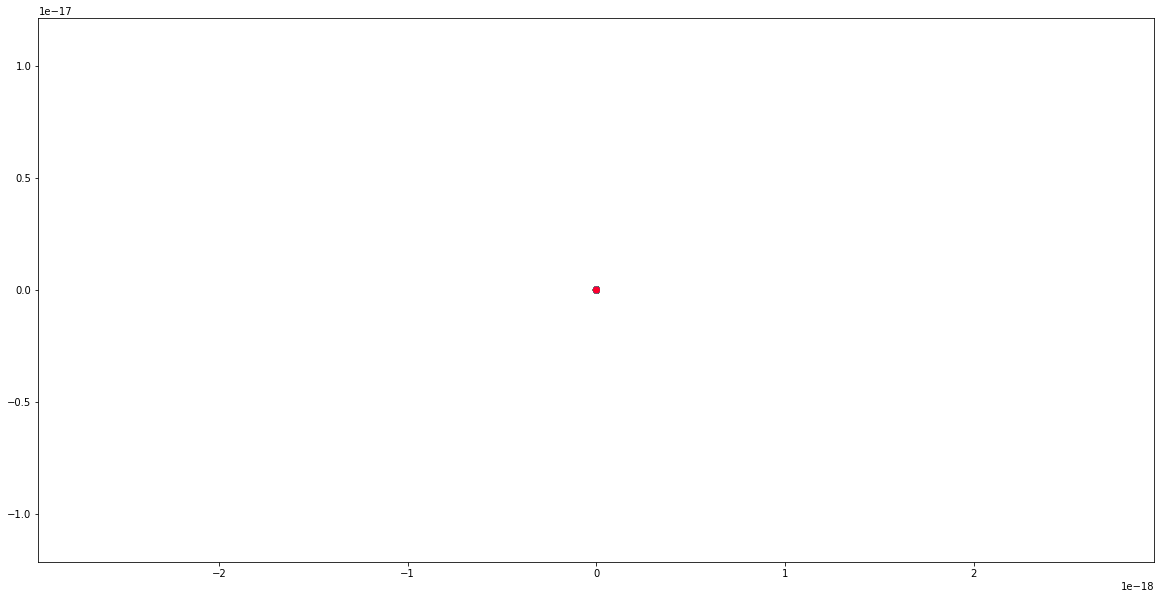

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
scatter_plot_points = pca.fit_transform(weights)
NUM_COLORS = 5

cm = plt.get_cmap('gist_rainbow')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# for i in range(NUM_COLORS):
    # ax.plot(np.arange(10)*(i+1))
    
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xbound(lower = -0.5e-15, upper = 0.5e-15)
ax.set_ybound(lower = -1e-15, upper = 1e-15)

ax.scatter(x_axis, y_axis, c = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])